In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import pandas as pd
import geopandas as gpd
import xarray as xr
import salem
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl

c:\Users\byy\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\byy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\byy\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
topo_data = xr.open_dataset(r'./main-basin_east-arm.nc')
topo_data

<xarray.Dataset> Size: 369kB
Dimensions:  (lat: 222, lon: 410)
Coordinates:
  * lat      (lat) float64 2kB 60.86 60.87 60.88 60.89 ... 63.01 63.02 63.03
  * lon      (lon) float64 3kB -117.0 -117.0 -117.0 ... -109.1 -109.1 -109.1
Data variables:
    crs      |S1 1B ...
    Band1    (lat, lon) float32 364kB ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.4.1, released 2021/12/27
    history:             Wed Mar 05 11:18:35 2025: GDAL CreateCopy( main-basi...

C:\Users\byy\AppData\Local\Temp\ipykernel_7696\769368223.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  tcf = geo_axes.contourf(lon2D,lat2D,topo_data.Band1.values*-1,cmap='terrain_r',norm='log',levels = np.arange(0.1, 600), locator=locator)


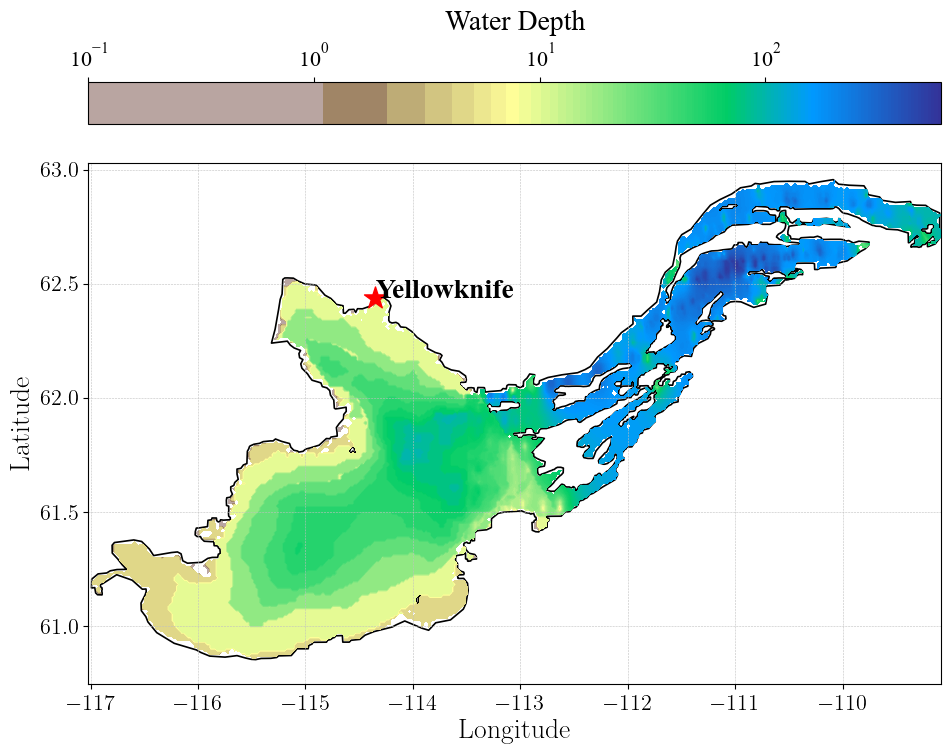

In [100]:
from cartopy.feature import ShapelyFeature
import shapely.vectorized
import shapefile as shp

# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['text.usetex'] = True

import geopandas as gpd
import pandas as pd
geo_df_total = pd.DataFrame()
geo_df = gpd.read_file('shoreline.geojson')
geo_df_total = gpd.GeoDataFrame( pd.concat( [geo_df_total, geo_df], ignore_index=True) )
geo_axes = geo_df_total.plot(facecolor='none', edgecolor='black', linewidth=1.2, figsize=(11, 10.0), zorder=0)
geo_axes.set_xlabel("Longitude", fontsize=20)
geo_axes.set_ylabel("Latitude", fontsize=20)
geo_axes.grid(linestyle = 'dashed', linewidth = 0.4, color='#C0C0C0')
stat_lon2 = [-114.348]
stat_lat2 = [62.4355]
geo_axes.scatter(stat_lon2, stat_lat2, zorder=10, marker='*', color='red', s = 275)
mpl.rcParams['text.usetex'] = False
anno_labels2 = ['Yellowknife']
for i, txt in enumerate(anno_labels2):
    geo_axes.annotate(txt, (stat_lon2[i], stat_lat2[i]), zorder=11, fontsize=20, weight='bold')

lat = topo_data.lat.values
lon = topo_data.lon.values
lon2D, lat2D = np.meshgrid(lon,lat)
from matplotlib import cm, ticker
locator = ticker.LogLocator(base=10)
tcf = geo_axes.contourf(lon2D,lat2D,topo_data.Band1.values*-1,cmap='terrain_r',norm='log',levels = np.arange(0.1, 600), locator=locator)
cb = fig.colorbar(tcf, extend='max',orientation='horizontal', location='top', ticks=locator, shrink=1)
cb.set_label('Water Depth', fontsize=20, labelpad=9)
